In [1]:
import sys
print(sys.version)

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


In [2]:
import cv2

import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

import os, json, itertools

In [3]:
from classes.Image import Image
from classes.FilterSequence import FilterSequence
from classes.PipelineStream import PipelineStream

In [4]:
imagepath = '../../dataset/training/'
datapath = '../data/'

In [5]:
imagens_originais = []
imagens_grayscale = []

arq_imagens = []
ext_imagens = []

for folder in os.listdir(imagepath):
    fpath = imagepath + folder + '/'
    cfolder = [c for c in os.listdir(fpath) if c.endswith("[01].png")]
    arq_imagens.extend([fpath + png for png in cfolder])
    ext_imagens.extend([nn.replace(".png", "") for nn in cfolder])

arq_imagens.sort()
ext_imagens.sort()
    
for i in range(len(arq_imagens)):
  aimg = arq_imagens[i]
  img = cv2.imread(aimg)
  imagens_originais.append(img)
  imagens_grayscale.append(cv2.cvtColor(img, cv2.COLOR_RGB2GRAY))

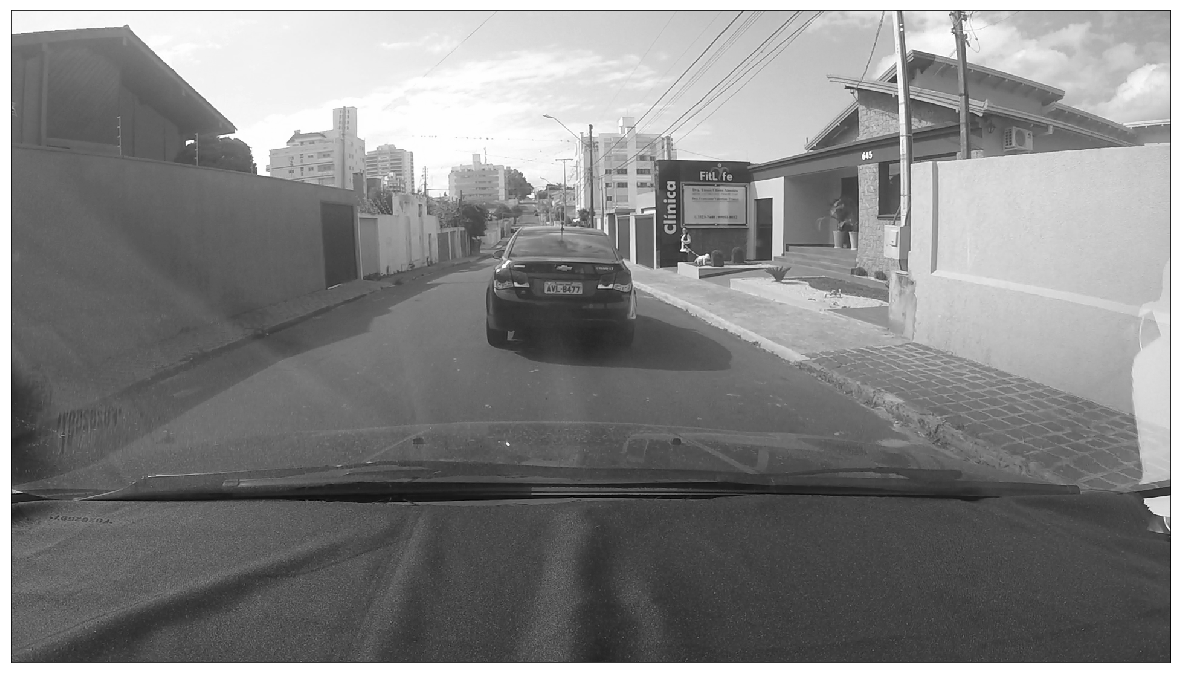

In [6]:
plt.figure(figsize=(30,12))
plt.imshow(imagens_grayscale[1], cmap="gray")
plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

In [ ]:
teste = imagens_grayscale[1]

plt.figure(figsize=(20, 10))
plt.subplot(2,3,1)
plt.title("Original")
plt.imshow(teste, cmap="gray")

nbins = 64
h, bin_edges = np.histogram(teste.ravel(), nbins, (0, 255))
w = 256./nbins

bin_centers = bin_edges[1:] - (w/2)
plt.subplot(2,3,4)
plt.title("Histograma Original")
plt.bar(bin_centers, h, width=w)

###################################################################

plt.subplot(2,3,2)
teste_media = cv2.blur(teste, (5,5))
plt.title("Filtro de média")
plt.imshow(teste_media, cmap="gray")

nbins = 64
h, bin_edges = np.histogram(teste_media.ravel(), nbins, (0, 255))
w = 256 / nbins

bin_centers = bin_edges[1:] - (w/2)
plt.subplot(2,3,5)
plt.title("Histograma de média")
plt.bar(bin_centers, h, width=w)

###################################################################

plt.subplot(2,3,3)
teste_eql = cv2.equalizeHist(teste_media, (5,5))
plt.title("Imagem Equalizada")
plt.imshow(teste_eql, cmap="gray")

nbins = 64
h, bin_edges = np.histogram(teste_eql.ravel(), nbins, (0, 255))
w = 256 / nbins

bin_centers = bin_edges[1:] - (w/2)
plt.subplot(2,3,6)
plt.title("Histograma Equalizado")
plt.bar(bin_centers, h, width=w)

In [ ]:
plt.figure(figsize=(30,12))
plt.imshow(teste, cmap="gray")
plt.tick_params(bottom=False, labelbottom=False, left=False, labelleft=False)

In [ ]:
laplacian = cv2.Laplacian(teste_eql, cv2.CV_64F)
laplacian = cv2.normalize(laplacian, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

In [ ]:
kernelx = np.array([[1,1,1], [0,0,0], [-1, -1, -1]])
kernely = np.array([[-1,0,1], [-1,0,1], [-1, 0, 1]])
img_prewittx = cv2.filter2D(teste_eql, -1, kernelx)
img_prewitty = cv2.filter2D(teste_eql, -1, kernely)

In [ ]:
sobelx = cv2.Sobel(teste_eql, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(teste_eql, cv2.CV_64F, 0, 1, ksize=3)
t1, t2 = np.uint8(np.absolute(sobelx)), np.uint8(np.absolute(sobely))
true_sobel = cv2.bitwise_or(t1, t2)
sobel_mag = (sobelx**2 + sobely**2) ** 0.5
sobel_ang = np.rad2deg(np.angle(sobelx+sobely*1j))
sobel_ang = (sobel_ang >= 0) * sobel_ang + (sobel_ang < 0) * (sobel_ang + 180)
sobel_ang = (sobel_ang < 180) * sobel_ang

In [ ]:
sobelxn = cv2.normalize(sobelx, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
sobelyn = cv2.normalize(sobely, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
sobel_magn = cv2.normalize(sobel_mag, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)
sobel_angn = cv2.normalize(sobel_ang, None, alpha = 0, beta = 255,
                          norm_type = cv2.NORM_MINMAX, dtype = cv2.CV_8U)

In [ ]:
canny = cv2.Canny(teste_eql, 100, 300)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
morphg = cv2.morphologyEx(teste_eql, cv2.MORPH_GRADIENT, kernel)

In [ ]:
plt.figure(figsize=(30, 12))

plt.subplot(3,3,1)
plt.imshow(laplacian, cmap="gray")

plt.subplot(3,3,2)
plt.imshow(img_prewittx, cmap="gray")

plt.subplot(3,3,3)
plt.imshow(img_prewitty, cmap="gray")

plt.subplot(3,3,4)
plt.imshow(sobelxn, cmap="gray")

plt.subplot(3,3,5)
plt.imshow(sobelyn, cmap="gray")

plt.subplot(3,3,6)
plt.imshow(sobel_magn, cmap="gray")

plt.subplot(3,3,7)
plt.imshow(sobel_angn, cmap="gray")

plt.subplot(3,3,8)
plt.imshow(canny, cmap="gray")

plt.subplot(3,3,9)
plt.imshow(morphg, cmap="gray")

In [ ]:
plt.figure(figsize=(30,12))
plt.imshow(canny, cmap="gray")

In [ ]:
plt.figure(figsize=(30,45))

for i in range(9):
  limiar = int(255*(i+1)/10.0)
  plt.subplot(9, 3, i*3+1)
  _, xthr = cv2.threshold(sobelxn, limiar, 255, cv2.THRESH_BINARY)
  plt.imshow(xthr, cmap="gray")
  plt.subplot(9, 3, (i*3)+2)
  _, ythr = cv2.threshold(sobelxn, limiar, 255, cv2.THRESH_BINARY)
  plt.imshow(ythr, cmap="gray")
  plt.subplot(9, 3, (i*3)+3)
  _, mthr = cv2.threshold(sobelxn, limiar, 255, cv2.THRESH_BINARY)
  plt.imshow(mthr, cmap="gray")

In [ ]:
_, xthrg = cv2.threshold(sobelxn, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, ythrg = cv2.threshold(sobelyn, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, mthrg = cv2.threshold(sobel_magn, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
_, true_thr = cv2.threshold(true_sobel, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.figure(figsize=(30,12))
plt.imshow(xthrg, cmap="gray")
plt.figure(figsize=(30,12))
plt.imshow(ythrg, cmap="gray")
plt.figure(figsize=(30,12))
plt.imshow(mthrg, cmap="gray")
plt.figure(figsize=(30,12))
plt.imshow(true_thr, cmap="gray")

In [ ]:
xthr = cv2.adaptiveThreshold(sobelxn, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
ythr = cv2.adaptiveThreshold(sobelyn, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)
mthr = cv2.adaptiveThreshold(sobel_magn, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

plt.figure(figsize=(30,12))
plt.subplot(1,3,1)
plt.imshow(xthr, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(ythr, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(mthr, cmap="gray")

In [ ]:
xthr = cv2.adaptiveThreshold(sobelxn, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)
ythr = cv2.adaptiveThreshold(sobelyn, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)
mthr = cv2.adaptiveThreshold(sobel_magn, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)

plt.figure(figsize=(30,12))
plt.subplot(1,3,1)
plt.imshow(xthr, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(ythr, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(mthr, cmap="gray")

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10,8))
morphDx = cv2.dilate(canny, kernel, 1)

_, contours1, hierarch = cv2.findContours(morphDx, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont1 = cv2.cvtColor(teste_eql, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_cont1, contours1, -1, (0, 255, 0), 3)
plt.figure(figsize=(30,12))
plt.imshow(img_cont1, cmap="gray")

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (13,11))
morphDy = cv2.dilate(ythr, kernel, 1)

_, contours2, hierarch = cv2.findContours(morphDy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont2 = cv2.cvtColor(teste, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_cont2, contours2, -1, (0, 255, 0), 3)
plt.figure(figsize=(30,12))
plt.imshow(img_cont2, cmap="gray")

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (8,9))
morphDm = cv2.dilate(mthr, kernel, 1)

_, contours3, hierarch = cv2.findContours(morphDm, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont3 = cv2.cvtColor(teste, cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_cont3, contours3, -1, (0, 255, 0), 3)
plt.figure(figsize=(30,12))
plt.imshow(img_cont3, cmap="gray")

In [ ]:
color = cv2.cvtColor(teste_eql, cv2.COLOR_GRAY2BGR)

for cnt in contours1:
  epsilon = 0.05 * cv2.arcLength(cnt, True)
  approx = cv2.approxPolyDP(cnt,epsilon,True)
  
  if (len(approx) == 4):
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(color, (x,y), (x+w, y+h), (255, 0, 0), 2)
    ar = 1.0 * h / 2

    if (ar >= 0.3 and ar <= 20 and h * w >= 2000 and h * w <= 23000):
      print (ar, h, w, h*w)
      cv2.rectangle(color, (x,y),(x+w, y+h), (0, 255, 0), 8)
      
plt.figure(figsize=(30,12))
plt.imshow(color, cmap="gray")

In [ ]:
minArea = 2700
maxArea = 20000

thrs = []
axthrs = []
fxthrs = []
coloreds = []

plt.figure(figsize=(30, 12))

for i in range(n):
  imgi = imagens_grayscale[i]
  imgi_eq = cv2.equalizeHist(imgi)
  
  kernelTh = cv2.getStructuringElement(cv2.MORPH_RECT, (17, 17))
  morphTh = cv2.morphologyEx(imgi_eq, cv2.MORPH_TOPHAT, kernelTh)
  _, thr = cv2.threshold(morphTh, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  thrs.append(thr)
  
  kernelAx = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 11))
  morphAx = cv2.morphologyEx(thr, cv2.MORPH_OPEN, kernelAx)
  _, axthr = cv2.threshold(morphAx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  axthrs.append(axthr)
  
  kernelFx = cv2.getStructuringElement(cv2.MORPH_RECT, (23, 1))
  morphFx = cv2.morphologyEx(morphAx, cv2.MORPH_CLOSE, kernelFx)
  _, fxthr = cv2.threshold(morphFx, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  
  fxthrs.append(fxthr)

  _, contours4, hierarch = cv2.findContours(morphFx, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  color = cv2.cvtColor(imgi_eq, cv2.COLOR_GRAY2BGR)
  
  coloreds.append(color)
  
  for cnt in contours4:
    epsilon = 0.05 * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    if (len(approx) == 4):
      x,y,w,h = cv2.boundingRect(cnt)
      ar = 1.0 * h / w
      
      if (ar >= 0.3 and ar <= 0.55 and h*w > minArea and h*w < maxArea):
        cv2.rectangle(color, (x,y), (x+w, y+h), (255, 0, 0), 2)
  plt.subplot(2, 4, i+1)
  plt.imshow(color, cmap="gray")

In [ ]:
plt.figure(figsize=(30,12))
plt.imshow(coloreds[6], cmap="gray")

In [ ]:
import skimage
from skimage import filters, feature

In [ ]:
testex = imagens_grayscale[1]
denoised = filters.median(testex, selem=np.ones((5,5)))
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(15,5))
ax0.imshow(testex)
ax1.imshow(denoised)

In [ ]:
edges = feature.canny(testex, sigma=3)
plt.figure(figsize=(30,12))
plt.imshow(edges)

In [ ]:
from scipy.ndimage import distance_transform_edt
dt = distance_transform_edt(~edges)

plt.figure(figsize=(30,12))
plt.imshow(dt)

In [ ]:
local_max = feature.peak_local_max(dt, indices=False, min_distance=1)
plt.figure(figsize=(30,12))
plt.imshow(local_max, cmap="gray")